<a href="https://colab.research.google.com/github/rc-dbe/dti/blob/main/001_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

## **Multiple Linear Regression**

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [52]:
# Import Dataset
df_house = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_house

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


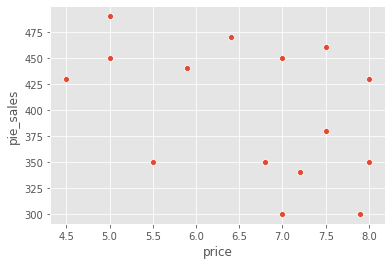

In [53]:
# Visualize the data using scatterplot
sns.scatterplot(x="price", y="pie_sales", data= df_house)

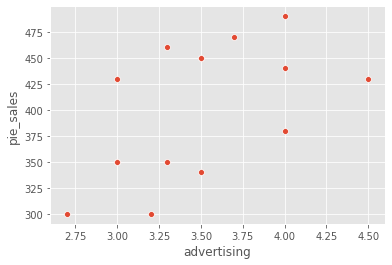

In [54]:
# Visualize the data using scatterplot
sns.scatterplot(x="advertising", y="pie_sales", data= df_house)

### **Regression using Sklearn**

In [58]:
X = df_house[['price']]
Y = df_house['pie_sales']
Z = df_house[['advertising']]

In [59]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

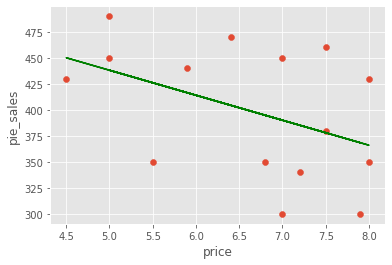

In [60]:
# Visualizing Linear Regression
plt.scatter(X, Y)
plt.plot(X, regr.predict(X), color = "green")
plt.xlabel("price")
plt.ylabel("pie_sales")
plt.show()

In [61]:
regr = linear_model.LinearRegression()
regr.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

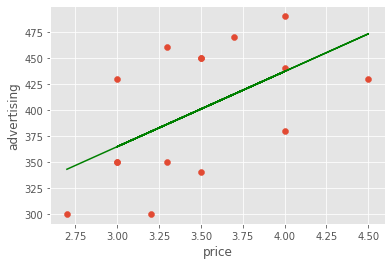

In [62]:
# Visualizing Linear Regression
plt.scatter(Z, Y)
plt.plot(Z, regr.predict(Z), color = "green")
plt.xlabel("price")
plt.ylabel("advertising")
plt.show()

In [65]:
X = df_house[['price','advertising']]
Y = df_house['pie_sales']

In [66]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [68]:
# prediction with sklearn
new_price = 3.0
new_advertising = 4.0 
print ('Predicted  pie sales: \n', regr.predict([[new_advertising,new_price]]))

Predicted  pie sales: 
 [429.01870768]


### **Regression using Statsmodels**

In [69]:
X = sm.add_constant(X) # adding a constant

In [70]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0120
Time:                        01:58:55   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      